# Assignment 3: Hypothesis Testing


# QUESTION 1

# Dataset : Cutlets.csv


# Assumptions of Hypothesis
Null Hypothesis Ho : μ1 = μ2 (There is no difference in diameters of cutlets between two units).
Alternate Hypothesis Ha : μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units)
As its problem of 2 samples, 2 sample 2 test approach is applicable
Also, as the number of samples collected from both the units are greater than 30 so, insted of using t-test we need to use z-test to calculate p-value. The reason we are using z-test is that, as no. of samples increases t-distribution approaches to standard normal distribution.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/Cutlets.csv")

# EDA

In [4]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [6]:
df.shape

(35, 2)

In [8]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [9]:
# Checking for any null values 
df.isna().sum()


Unit A    0
Unit B    0
dtype: int64

array([[<AxesSubplot:title={'center':'Unit A'}>,
        <AxesSubplot:title={'center':'Unit B'}>]], dtype=object)

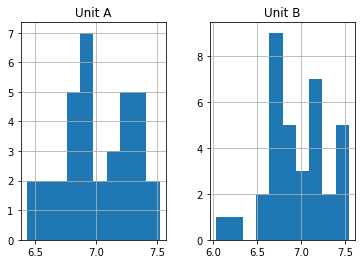

In [11]:
df.hist()

# Preparing data to be used in problem solving


In [10]:
unit_a = df['Unit A']
unit_b = df['Unit B']


# Applying ztest from statsmodels.stats, weightstats


In [11]:
# This will return two values, 1) ztest vaue, 2)p_value
ztest, pvalue = stests.ztest(x1 = unit_a, x2=unit_b, value=0,alternative='two-sided')


In [12]:
# significance level given is α = 0.05
pvalue = float(pvalue)
α = 0.05

print("P-value: ", pvalue)

if pvalue <= α:
    print("Rejecting null hypothesis")
    print("Conclusion: There is significant difference in diameters of cutlets between two units")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: There is no significant difference in diameters of cutlets between two units")


P-value:  0.46976045023906055
Fail to reject null hypothesis
Conclusion: There is no significant difference in diameters of cutlets between two units


# Result: Fail to reject null hypothesis


# Inference: There is no significant difference in diameters of cutlets between two units


# QEUSTION 2

 A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
    
        Minitab File: LabTAT.mtw

# Dataset : LabTAT.csv
    

# Hypothesis Test: Anova ftest statistics

# Assumptions of Hypothesis

# Null Hypothesis Ho : μ1 = μ2 = μ3 = μ4 (All samples Turn Around Time (TAT) population means are same)
Alternate Hypothesis: Atleast one sample Turn Around Time (TAT) population mean is different


In [13]:
libtat_data  = pd.read_csv("C:/Users/user/Downloads/LabTAT.csv")

# EDA

In [14]:
libtat_data .head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [15]:
libtat_data .describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [16]:
libtat_data.shape


(120, 4)

In [17]:
# Check for null values
libtat_data.isna().sum()


Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

array([[<AxesSubplot:title={'center':'Laboratory 1'}>,
        <AxesSubplot:title={'center':'Laboratory 2'}>],
       [<AxesSubplot:title={'center':'Laboratory 3'}>,
        <AxesSubplot:title={'center':'Laboratory 4'}>]], dtype=object)

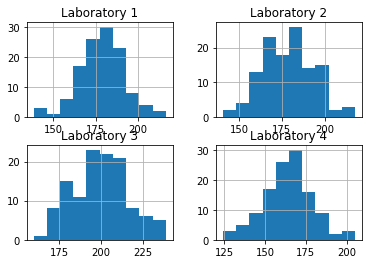

In [18]:
libtat_data.hist()

# Preparing data to be used in problem solving


In [19]:
lab1 = libtat_data['Laboratory 1']
lab2 = libtat_data['Laboratory 2']
lab3 = libtat_data['Laboratory 3']
lab4 = libtat_data['Laboratory 4']


# Applying ANOVA Ftest statistics


In [20]:
import scipy.stats as stats
α = 0.05

f_test, pvalue = stats.f_oneway(lab1, lab2, lab3, lab4)

print("P-value: ", pvalue)

if pvalue <= α:
    print("Rejecting null hypothesis")
    print("Conclusion:  Atleast one sample TAT population mean is different")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: All samples TAT population means are same")


P-value:  2.1156708949992414e-57
Rejecting null hypothesis
Conclusion:  Atleast one sample TAT population mean is different


# Result: Rejecting null hypothesis


# Inference: Atleast one sample TAT population mean is different


# QEUSTION 3

# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

# Buyer Ratio.mtw

Hypothesis Test: Chi2 contingency Test

Assumptions of Hypothesis

Null Hypothesis Ho : Male-Female buyer rations are similar across regions ,does not vary and not related
Alternate Hypothesis Ha : Male-Female buyer rations are NOT similar across regions


In [21]:
buyerratiodf=pd.read_csv("C:/Users/user/Downloads/BuyerRatio.csv")

# EDA

In [22]:
buyerratiodf.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [23]:
buyerratiodf.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


array([[<AxesSubplot:title={'center':'East'}>,
        <AxesSubplot:title={'center':'West'}>],
       [<AxesSubplot:title={'center':'North'}>,
        <AxesSubplot:title={'center':'South'}>]], dtype=object)

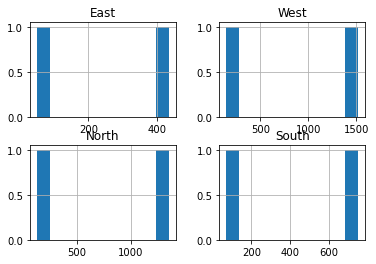

In [24]:
buyerratiodf.hist()

In [26]:
# Making two dimensional array from available data  
obs=np.array([[50,142,131,70],
              [435,1523,1356,750]])
obs


array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

# Applying chi2_contigency test


In [27]:
chi2, pvalue, dof, ex = chi2_contingency(obs)


In [28]:
α = 0.05

print(pvalue)

if pvalue <= α:
   print("Rejecting null hypothesis")
   print("Conclusion: Male-Female buyer rations are NOT similar across regions and related")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: Male-Female buyer rations are similar across regions and not related") 


0.6603094907091882
Fail to reject null hypothesis
Conclusion: Male-Female buyer rations are similar across regions and not related


# Result: Fail to reject null hypothesis


# Inference: Male-Female buyer rations are similar across regions and not related


p=0.6603>0.05,it means male-female buyer ratios are similar across the region.

# QEUSTION 4

     TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences
     
     Minitab File: CustomerOrderForm.mtw

Hypothesis Test: Chi2 contingency test
    
Null Hypothesis: Customer order forms defective % does not varies by centre
    
Alternate Hypothesis: Customer order forms defective % varies by centre


In [30]:
cust_data=pd.read_csv('C:/Users/user/Downloads/Costomer+OrderForm (1).csv')

# EDA

In [31]:
cust_data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [32]:
cust_data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [33]:
cust_data.shape

(300, 4)

In [34]:
# checking for null values
cust_data.isna().sum()


Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [35]:
# Getting count of categorical data i.e., Error free and Defective from dataset
error_free_Phillippines, defective_Phillippines = cust_data.Phillippines.value_counts()
error_free_Indonesia, defective_Indonesia = cust_data.Indonesia.value_counts()
error_free_Malta, defective_Malta = cust_data.Malta.value_counts()
error_free_India, defective_India = cust_data.India.value_counts()


In [36]:
# Converting the count of data into 2D array
obs = np.array([[error_free_Phillippines, error_free_Indonesia, error_free_Malta, error_free_India],
               [defective_Phillippines, defective_Indonesia, defective_Malta, defective_India]])
obs


array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

# Applying chi2_contigency test

In [37]:
chi2, pvalue, dof, ex = chi2_contingency(obs)


In [38]:
α = 0.05



if pvalue <= α:
   print("Rejecting null hypothesis")
   print("Conclusion: Customer order forms defective %  varies by centre")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: Customer order forms defective %  does not varies by centre")


Fail to reject null hypothesis
Conclusion: Customer order forms defective %  does not varies by centre


# Result: Fail to reject null hypothesis


# Inference: Customer order forms defective % does not varies by centre